In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
back_prop_file = pd.read_csv('./Run2025C_muon0_ZMu_150X_dataRun3_Prompt_v1_backprop.csv', header=None)
back_prop_file.columns = ["detId", "dx", "dy", "dz", "dphix", "dphiy", "dphiz", "n_muons"]
back_prop_file.insert(1, "chamber", [-1*int((abs(i)%1000)/10) if i<0 else int((i%1000)/10) for i in back_prop_file['detId']])
back_prop_file.insert(2, "layer", [abs(i)%10 for i in back_prop_file['detId']])

tracker_prop_file = pd.read_csv('./Run2025C_muon0_ZMu_150X_dataRun3_Prompt_v1_trackerprop.csv', header=None)
tracker_prop_file.columns = ["detId", "dx", "dy", "dz", "dphix", "dphiy", "dphiz", "n_muons"]
tracker_prop_file.insert(1, "chamber", [-1*int((abs(i)%1000)/10) if i<0 else int((i%1000)/10) for i in tracker_prop_file['detId']])
tracker_prop_file.insert(2, "layer", [abs(i)%10 for i in tracker_prop_file['detId']])

In [3]:
# print(back_prop_file)
# print(tracker_prop_file)

In [8]:
print(back_prop_file['dx']-tracker_prop_file['dx'])

0     -0.115842
1     -0.118688
2      0.096496
3      0.107926
4     -0.126488
         ...   
128    0.065201
129   -0.053878
130   -0.054095
131    0.039724
132    0.037854
Name: dx, Length: 133, dtype: float64


In [5]:
diff_data = {
    'diff_dx': back_prop_file['dx']-tracker_prop_file['dx'],
    'diff_dy': back_prop_file['dy']-tracker_prop_file['dy'],
    'diff_dphiz': back_prop_file['dphiz']-tracker_prop_file['dphiz'],
    'chamber': back_prop_file['chamber'],
    'layer': back_prop_file['layer']
}
diff_prop = pd.DataFrame(data=diff_data)

diff_lay_1 = diff_prop[diff_prop['layer']==1]
diff_lay_2 = diff_prop[diff_prop['layer']==2]

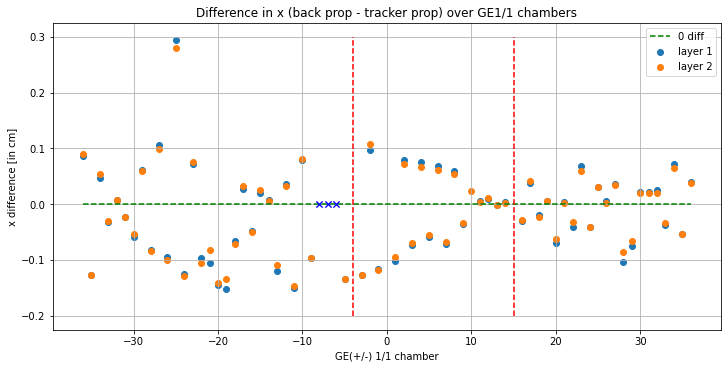

In [66]:
#x

fig_x, ax_x = plt.subplots(figsize=(10, 5), layout='constrained')
ax_x.plot([-36,36], [0,0], '--g', label='0 diff' )
ax_x.plot([-4,-4], [-0.2,0.3], '--r')
ax_x.plot([15,15], [-0.2,0.3], '--r')
ax_x.plot([-6,-6], [0,0], 'xb')
ax_x.plot([-7,-7], [0,0], 'xb')
ax_x.plot([-8,-8], [0,0], 'xb')
ax_x.scatter(diff_lay_1['chamber'], diff_lay_1['diff_dx'], label='layer 1')
ax_x.scatter(diff_lay_2['chamber'], diff_lay_2['diff_dx'], label='layer 2')

ax_x.set_xlabel('GE(+/-) 1/1 chamber')
ax_x.set_ylabel('x difference [in cm]')
ax_x.set_title('Difference in x (back prop - tracker prop) over GE1/1 chambers')
# ax_x.axis([-37,37, -0.3, 0.3])
ax_x.grid(True)
ax_x.legend()

plt.savefig('dx.pdf')

In [32]:
'''
Paired sample: https://www.ncl.ac.uk/webtemplate/ask-assets/external/maths-resources/statistics/hypothesis-testing/hypothesis-testing-with-the-student-t-distribution.html
t-table: https://www.sjsu.edu/faculty/gerstman/StatPrimer/t-table.pdf   

null hypothesis, h0: diff = 0
alternate hypo, h1: diff != 0

at 1% significance level (alpha = 0.01)

negative t-value indicated that the observed sample mean is smaller than the hypothesized sample mean
'''

'\nPaired sample: https://www.ncl.ac.uk/webtemplate/ask-assets/external/maths-resources/statistics/hypothesis-testing/hypothesis-testing-with-the-student-t-distribution.html\nt-table: https://www.sjsu.edu/faculty/gerstman/StatPrimer/t-table.pdf   \n\nnull hypothesis, h0: diff = 0\nalternate hypo, h1: diff != 0\n\nat 1% significance level\n'

In [87]:
sum_of_diff_dx = diff_prop['diff_dx'].sum()
average_diff_dx = sum_of_diff_dx / len(diff_prop['chamber'])
print('sum_of_diff_dx', sum_of_diff_dx, ', average_diff_dx', average_diff_dx)

diff_dx_avgDiff_squared = []
for d in diff_prop['diff_dx']:
    diff_dx_avgDiff_squared.append( (d-average_diff_dx)**2 )

sum_diff_dx_avgDiff_squared = sum(diff_dx_avgDiff_squared)

diff_dx_std_dev = np.sqrt(sum_diff_dx_avgDiff_squared / ( len(diff_prop['chamber'])-1 ) )
print('diff_dx_std_dev', diff_dx_std_dev)

#test statistics, t_dx
t_dx = ( average_diff_dx - 0 ) / ( diff_dx_std_dev / np.sqrt( len(diff_prop['chamber']) ) )
print('t statistics', t_dx)
print('at 1% significance level if ndof=100, t_0.01_100 = 2.626')
print(f'if {round(t_dx, 4)} is in the region of rejection, then the null hypothesis will be rejected.')
print(f' i.e. if {round(t_dx,4)}<-2.626 or {abs(round(t_dx,4))}>2.626')
print(f'if {t_dx} is not in the region of rejection then null hypothesis is not rejected, and for us it means that we can say that the dx values in the two prop type of samples are comparable at 1% significance level')

sum_of_diff_dx -2.12350918 , average_diff_dx -0.015966234436090226
diff_dx_std_dev 0.07913718431339159
t statistics -2.3267393151899163
at 1% significance level if ndof=100, t_0.01_100 = 2.626
if -2.3267 is in the region of rejection, then the null hypothesis will be rejected.
 i.e. if -2.3267<-2.626 or 2.3267>2.626
if -2.3267393151899163 is not in the region of rejection then null hypothesis is not rejected, and for us it means that we can say that the dx values in the two prop type of samples are comparable at 1% significance level


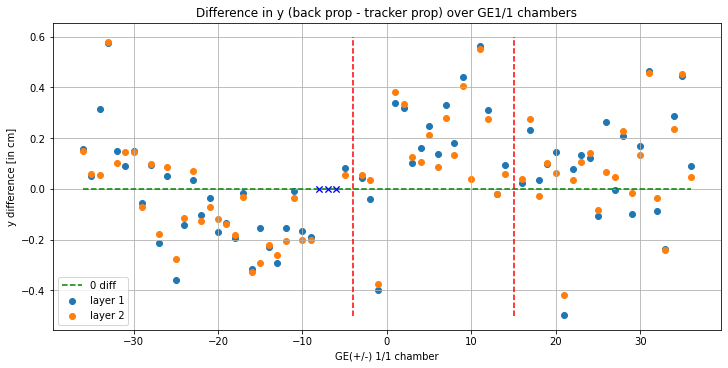

In [68]:
#y

fig_y, ax_y = plt.subplots(figsize=(10, 5), layout='constrained')
ax_y.plot([-36,36], [0,0], '--g', label='0 diff' )
ax_y.plot([-4,-4], [-0.5,0.6], '--r')
ax_y.plot([15,15], [-0.5,0.6], '--r')
ax_y.plot([-6,-6], [0,0], 'xb')
ax_y.plot([-7,-7], [0,0], 'xb')
ax_y.plot([-8,-8], [0,0], 'xb')
ax_y.scatter(diff_lay_1['chamber'], diff_lay_1['diff_dy'], label='layer 1')
ax_y.scatter(diff_lay_2['chamber'], diff_lay_2['diff_dy'], label='layer 2')

ax_y.set_xlabel('GE(+/-) 1/1 chamber')
ax_y.set_ylabel('y difference [in cm]')
ax_y.set_title('Difference in y (back prop - tracker prop) over GE1/1 chambers')
# ax_y.axis([-37,37, -0.3, 0.3])
ax_y.grid(True)
ax_y.legend()

plt.savefig('dy.pdf')

In [88]:
sum_of_diff_dy = diff_prop['diff_dy'].sum()
average_diff_dy = sum_of_diff_dy / len(diff_prop['chamber'])
print('sum_of_diff_dy', sum_of_diff_dy, ', average_diff_dy', average_diff_dy)

diff_dy_avgDiff_squared = []
for d in diff_prop['diff_dy']:
    diff_dy_avgDiff_squared.append( (d-average_diff_dy)**2 )

sum_diff_dy_avgDiff_squared = sum(diff_dy_avgDiff_squared)

diff_dy_std_dev = np.sqrt(sum_diff_dy_avgDiff_squared / ( len(diff_prop['chamber'])-1 ) )
print('diff_dy_std_dev', diff_dy_std_dev)

#test statistics, t_dy
t_dy = ( average_diff_dy - 0 ) / ( diff_dy_std_dev / np.sqrt( len(diff_prop['chamber']) ) )
print('t statistics', t_dy)
print('at 1% significance level if ndof=100, t_0.01_100 = 2.626')
print(f'if {round(t_dy, 4)} is in the region of rejection, then the null hypothesis will be rejected.')
print(f' i.e. if {-abs(round(t_dy,4))}<-2.626 or {abs(round(t_dy,4))}>2.626')
print(f'if {t_dy} is not in the region of rejection then null hypothesis is not rejected, and for us it means that we can say that the dy values in the two prop type of samples are comparable at 1% significance level')

sum_of_diff_dy 6.217394679999997 , average_diff_dy 0.046747328421052614
diff_dy_std_dev 0.21986751193893309
t statistics 2.4520061485898785
at 1% significance level if ndof=100, t_0.01_100 = 2.626
if 2.452 is in the region of rejection, then the null hypothesis will be rejected.
 i.e. if -2.452<-2.626 or 2.452>2.626
if 2.4520061485898785 is not in the region of rejection then null hypothesis is not rejected, and for us it means that we can say that the dy values in the two prop type of samples are comparable at 1% significance level


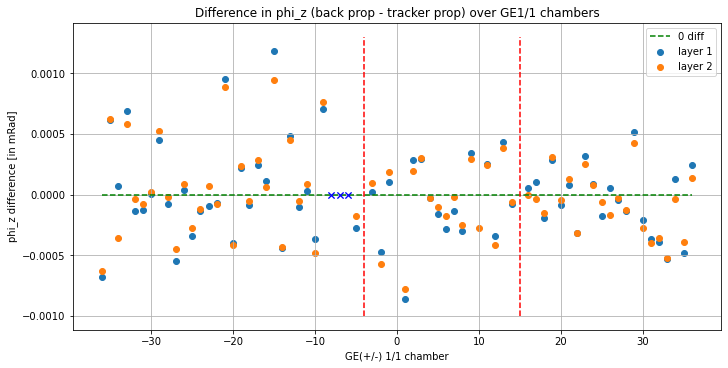

In [69]:
#phi_z

fig_phiz, ax_phiz = plt.subplots(figsize=(10, 5), layout='constrained')
ax_phiz.plot([-36,36], [0,0], '--g', label='0 diff' )
ax_phiz.plot([-4,-4], [-0.001,0.00130], '--r')
ax_phiz.plot([15,15], [-0.001,0.00130], '--r')
ax_phiz.plot([-6,-6], [0,0], 'xb')
ax_phiz.plot([-7,-7], [0,0], 'xb')
ax_phiz.plot([-8,-8], [0,0], 'xb')
ax_phiz.scatter(diff_lay_1['chamber'], diff_lay_1['diff_dphiz'], label='layer 1')
ax_phiz.scatter(diff_lay_2['chamber'], diff_lay_2['diff_dphiz'], label='layer 2')

ax_phiz.set_xlabel('GE(+/-) 1/1 chamber')
ax_phiz.set_ylabel('phi_z difference [in mRad]')
ax_phiz.set_title('Difference in phi_z (back prop - tracker prop) over GE1/1 chambers')
# ax_phiz.axis([-37,37, -0.3, 0.3])
ax_phiz.grid(True)
ax_phiz.legend()

plt.savefig('dphiz.pdf')

In [89]:
sum_of_diff_dphiz = diff_prop['diff_dphiz'].sum()
average_diff_dphiz = sum_of_diff_dphiz / len(diff_prop['chamber'])
print('sum_of_diff_dphiz', sum_of_diff_dphiz, ', average_diff_dphiz', average_diff_dphiz)

diff_dphiz_avgDiff_squared = []
for d in diff_prop['diff_dphiz']:
    diff_dphiz_avgDiff_squared.append( (d-average_diff_dphiz)**2 )

sum_diff_dphiz_avgDiff_squared = sum(diff_dphiz_avgDiff_squared)

diff_dphiz_std_dev = np.sqrt(sum_diff_dphiz_avgDiff_squared / ( len(diff_prop['chamber'])-1 ) )
print('diff_dphiz_std_dev', diff_dphiz_std_dev)

#test statistics, t_dphiz
t_dphiz = ( average_diff_dphiz - 0 ) / ( diff_dphiz_std_dev / np.sqrt( len(diff_prop['chamber']) ) )
print('t statistics', t_dphiz)
print('at 1% significance level if ndof=100, t_0.01_100 = 2.626')
print(f'if {round(t_dphiz, 4)} is in the region of rejection, then the null hypothesis will be rejected.')
print(f' i.e. if {round(t_dphiz,4)}<-2.626 or {abs(round(t_dphiz,4))}>2.626')
print(f'if {t_dphiz} is not in the region of rejection then null hypothesis is not rejected, and for us it means that we can say that the dphi_z values in the two prop type of samples are comparable at 1% significance level')

sum_of_diff_dphiz -0.0007803641699999993 , average_diff_dphiz -5.867399774436085e-06
diff_dphiz_std_dev 0.00036293913085559546
t statistics -0.1864394037841132
at 1% significance level if ndof=100, t_0.01_100 = 2.626
if -0.1864 is in the region of rejection, then the null hypothesis will be rejected.
 i.e. if -0.1864<-2.626 or 0.1864>2.626
if -0.1864394037841132 is not in the region of rejection then null hypothesis is not rejected, and for us it means that we can say that the dphi_z values in the two prop type of samples are comparable at 1% significance level
